## Walmart sales - data exploration

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels as sm
from plotnine import *

from IPython.display import display

from datetime import datetime, timedelta

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

### Dataframes

In [3]:
df = pd.read_csv('data/processed/all.csv')
df_holidays = pd.read_csv('data/processed/holidays.csv')

df['Date'] = pd.to_datetime(df['Date'])

holidays = sorted(df.query('IsHoliday==True').DateString.unique())
stores = sorted(df.Store.unique())

Building dataframes for a single store, which will be useful to study the data

In [4]:
df1 = df.copy().query("Store==1 and Train")
df1_idx = df1.set_index(['Date'])
df1_sales = df1_idx['WeeklySales']

### Exploring the data

#### How is the training data available for the same weeks across years?

In [5]:
df1.pivot(values='WeeklySales', index='Week', columns='Year')

Year,2010,2011,2012
Week,,,
1,NaN,20065.0,21532.0
2,NaN,19591.0,20557.0
3,NaN,18436.0,19101.0
4,NaN,18547.0,18847.0
5,22516.0,22628.0,22726.0
6,22804.0,22911.0,24691.0
7,22081.0,23428.0,24929.0
8,19579.0,20233.0,21380.0
9,21298.0,22414.0,23450.0


We have a full previous year of data starting on the 5th week of 2011.  
In 2012 data is available only until the 43rd week.

#### Is there a correlation between holidays and sales, sales increase ratio?

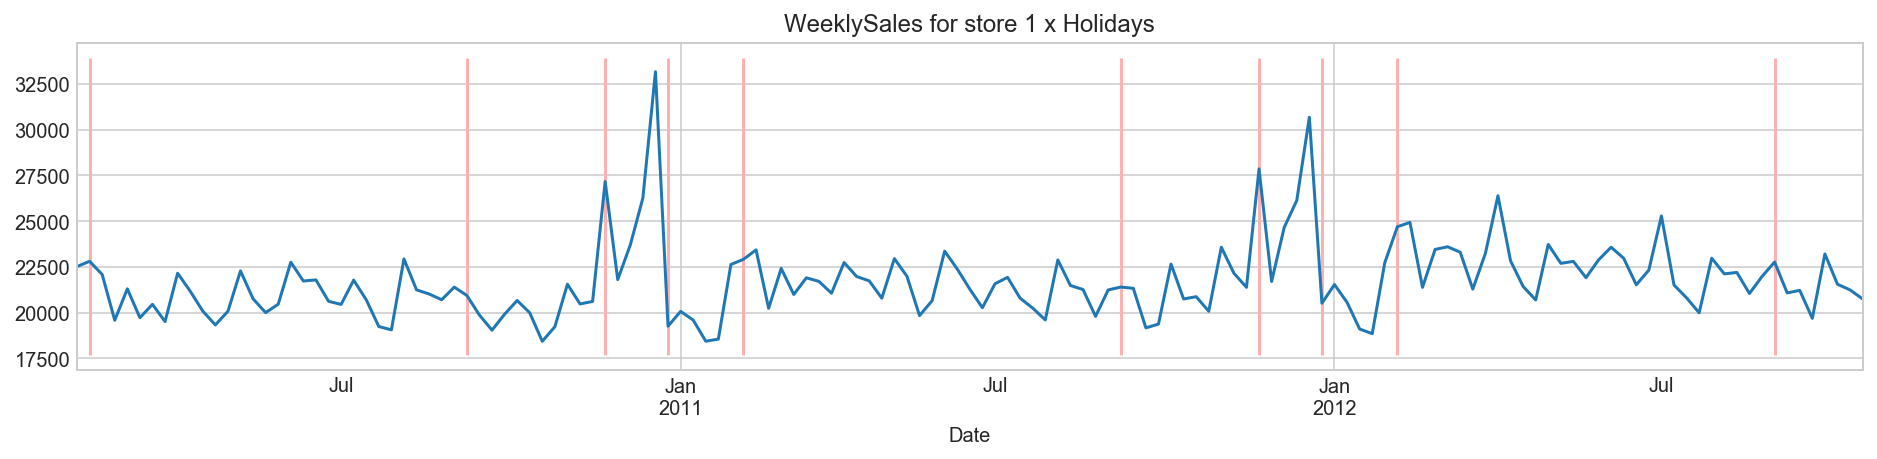

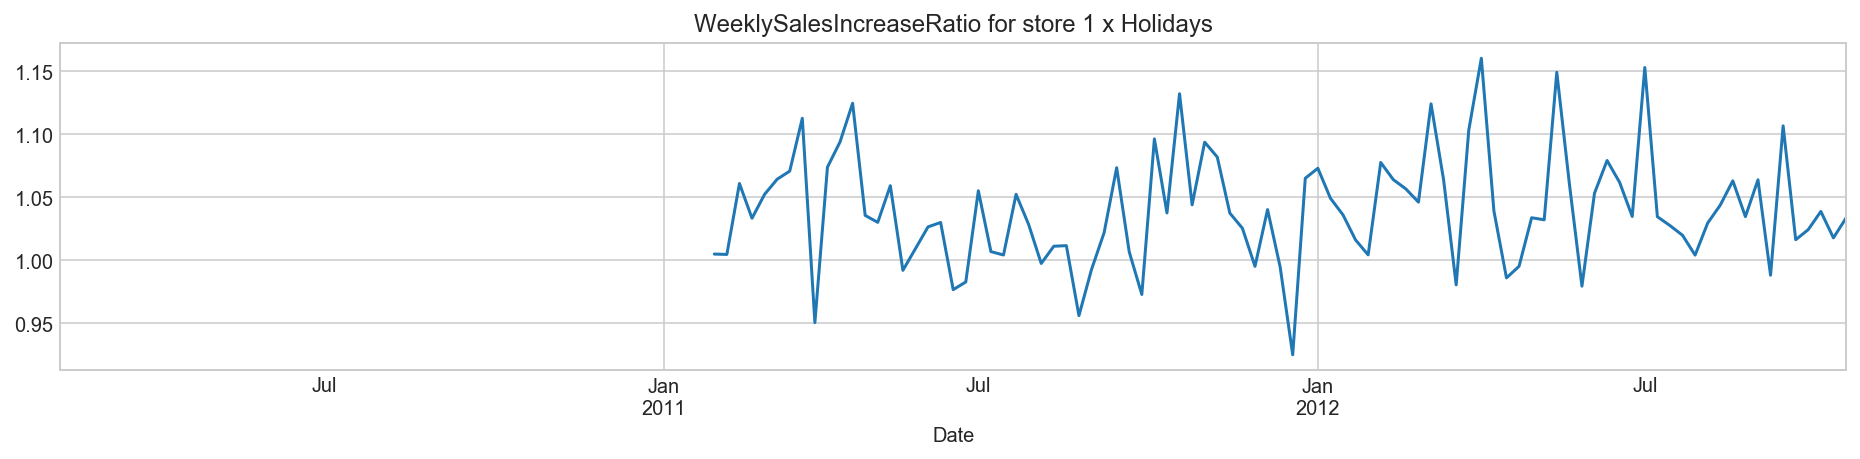

In [6]:
ax = df1.plot(x='Date', y='WeeklySales', figsize=(16,3), title="WeeklySales for store 1 x Holidays")
ax.legend([])
ymin, ymax = ax.get_ylim()
ax.vlines(x=holidays, ymin=ymin, ymax=ymax-1, color='#ffb0b0')
plt.show()

ax = df1.plot(x='Date', y='WeeklySalesIncreaseRatio', figsize=(16,3), title="WeeklySalesIncreaseRatio for store 1 x Holidays")
ax.legend([])
plt.show()

Christmas and Thanksgiving have a definite impact on sales.

The spikes around Thanksgiving happen around 1 day after the holiday itself, whereas for Christmas the spikes happen during 1-2 weeks before the holiday.

The increase in sales from one year to another doesn't seem to vary too wildly, which leads to the idea that building a model to predict the increase given the previous year's sales may be a good idea.

#### How are sales different for each store?

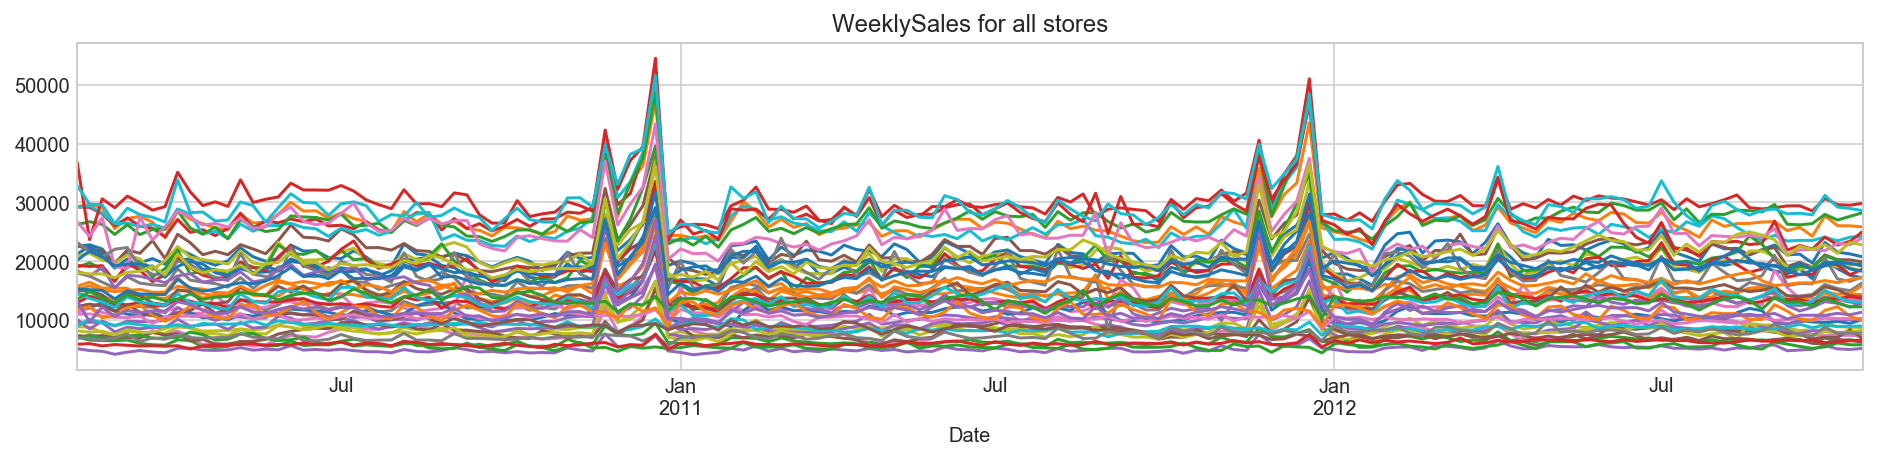

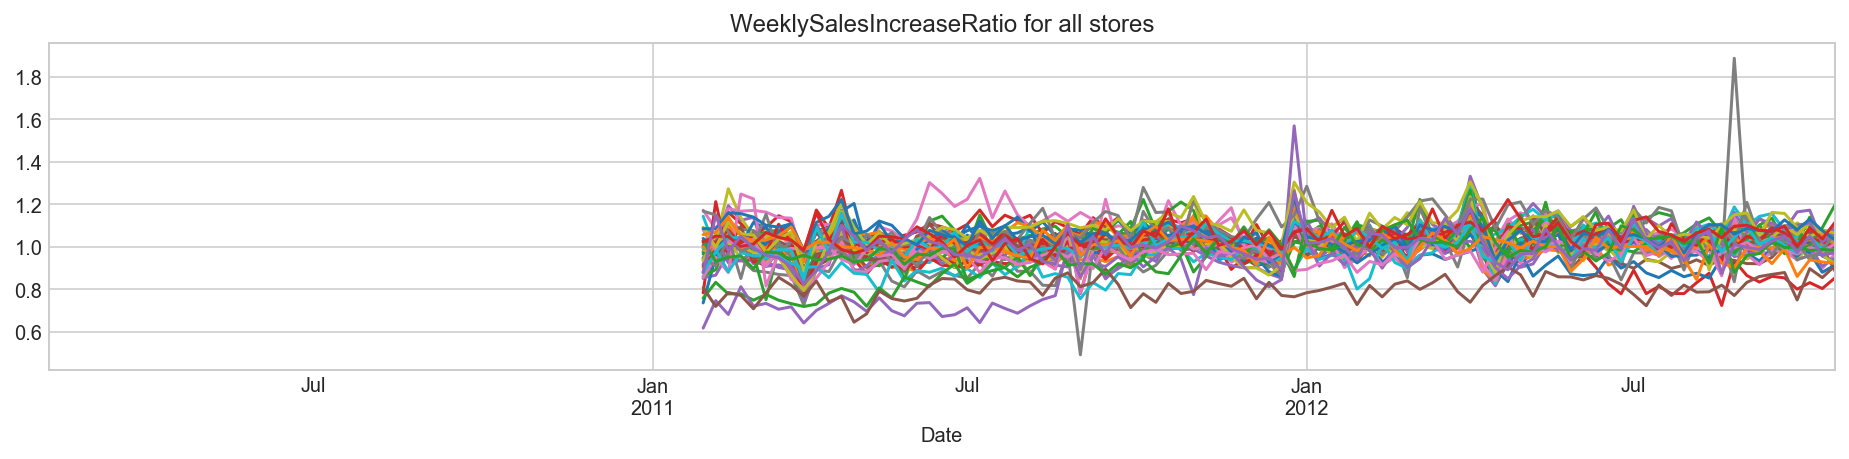

In [7]:
ax= df.query('Train').pivot(index='Date', columns='Store', values='WeeklySales').plot(figsize=(16,3), title="WeeklySales for all stores")
ax.legend([])
plt.show()

ax= df.query('Train').pivot(index='Date', columns='Store', values='WeeklySalesIncreaseRatio').plot(figsize=(16,3), title="WeeklySalesIncreaseRatio for all stores")
ax.legend([])
plt.show()

#### What's the overall distribution of sales?

In [8]:
dfsales = df[['Store','WeeklySales']].groupby('Store').mean().reset_index().sort_values('WeeklySales')
dfsales

,Store,WeeklySales
4,5,5051.195804
32,33,5749.867133
43,44,6035.657343
2,3,6369.734266
37,38,7487.419580
15,16,7863.867133
28,29,8153.552448
6,7,8357.769231
35,36,8633.013986
8,9,8768.118881


In [9]:
dfsales.WeeklySales.mean(), dfsales.WeeklySales.std()

(15437.731313131313, 7007.5342064070619)

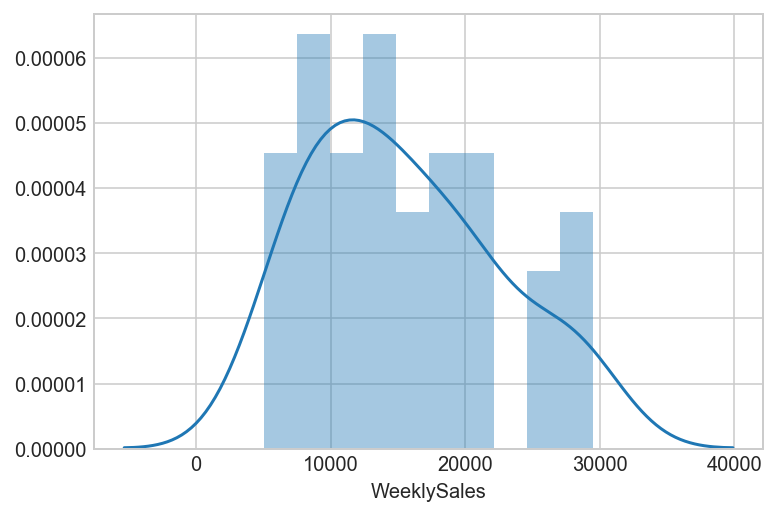

In [10]:
ax = sns.distplot(dfsales.WeeklySales, bins=10)

#### How do sales change from one week to another?

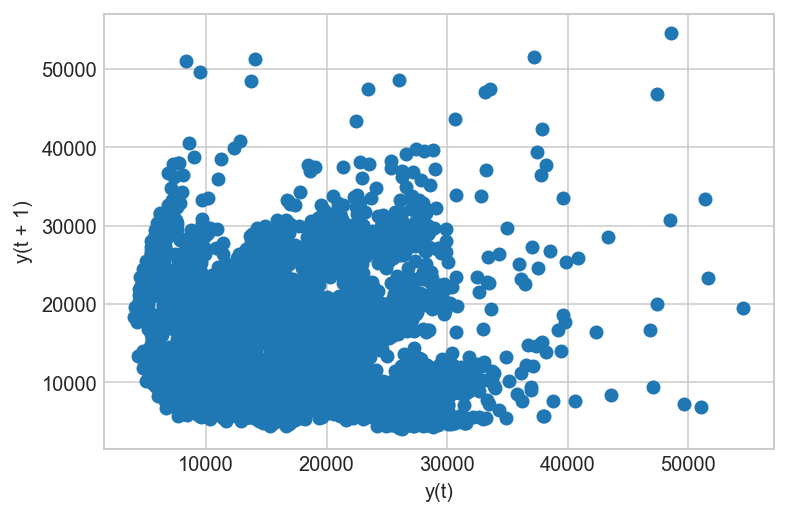

In [11]:
from pandas.plotting import lag_plot
lag_plot(df.query('Train')['WeeklySales'], lag=1)
#lag_plot(df1_sales, lag=52)
plt.show()

#### How do sales change from one year to another?

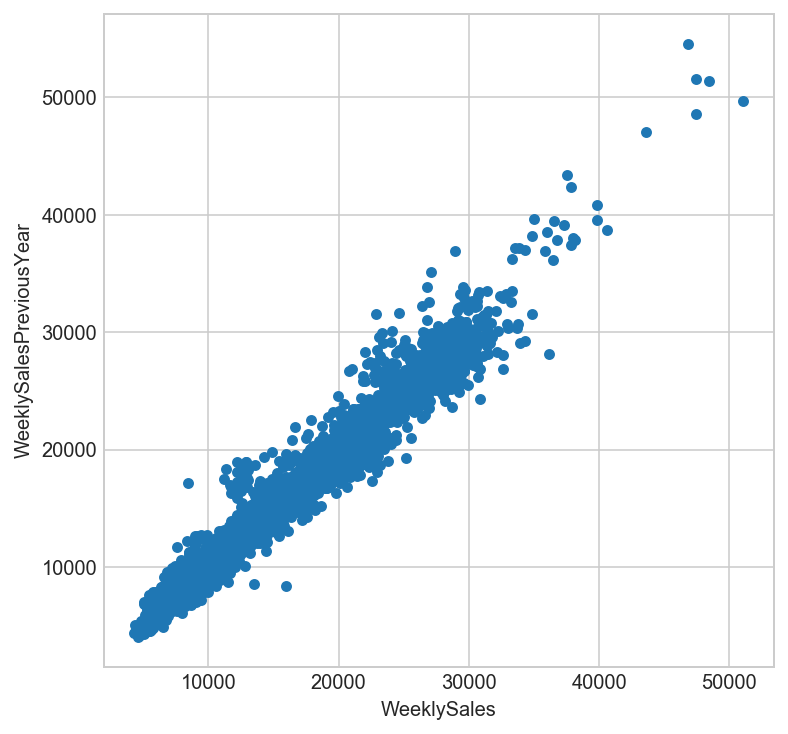

In [12]:
ax = df.query('Train').plot(x='WeeklySales', y='WeeklySalesPreviousYear', kind='scatter', figsize=(6,6))

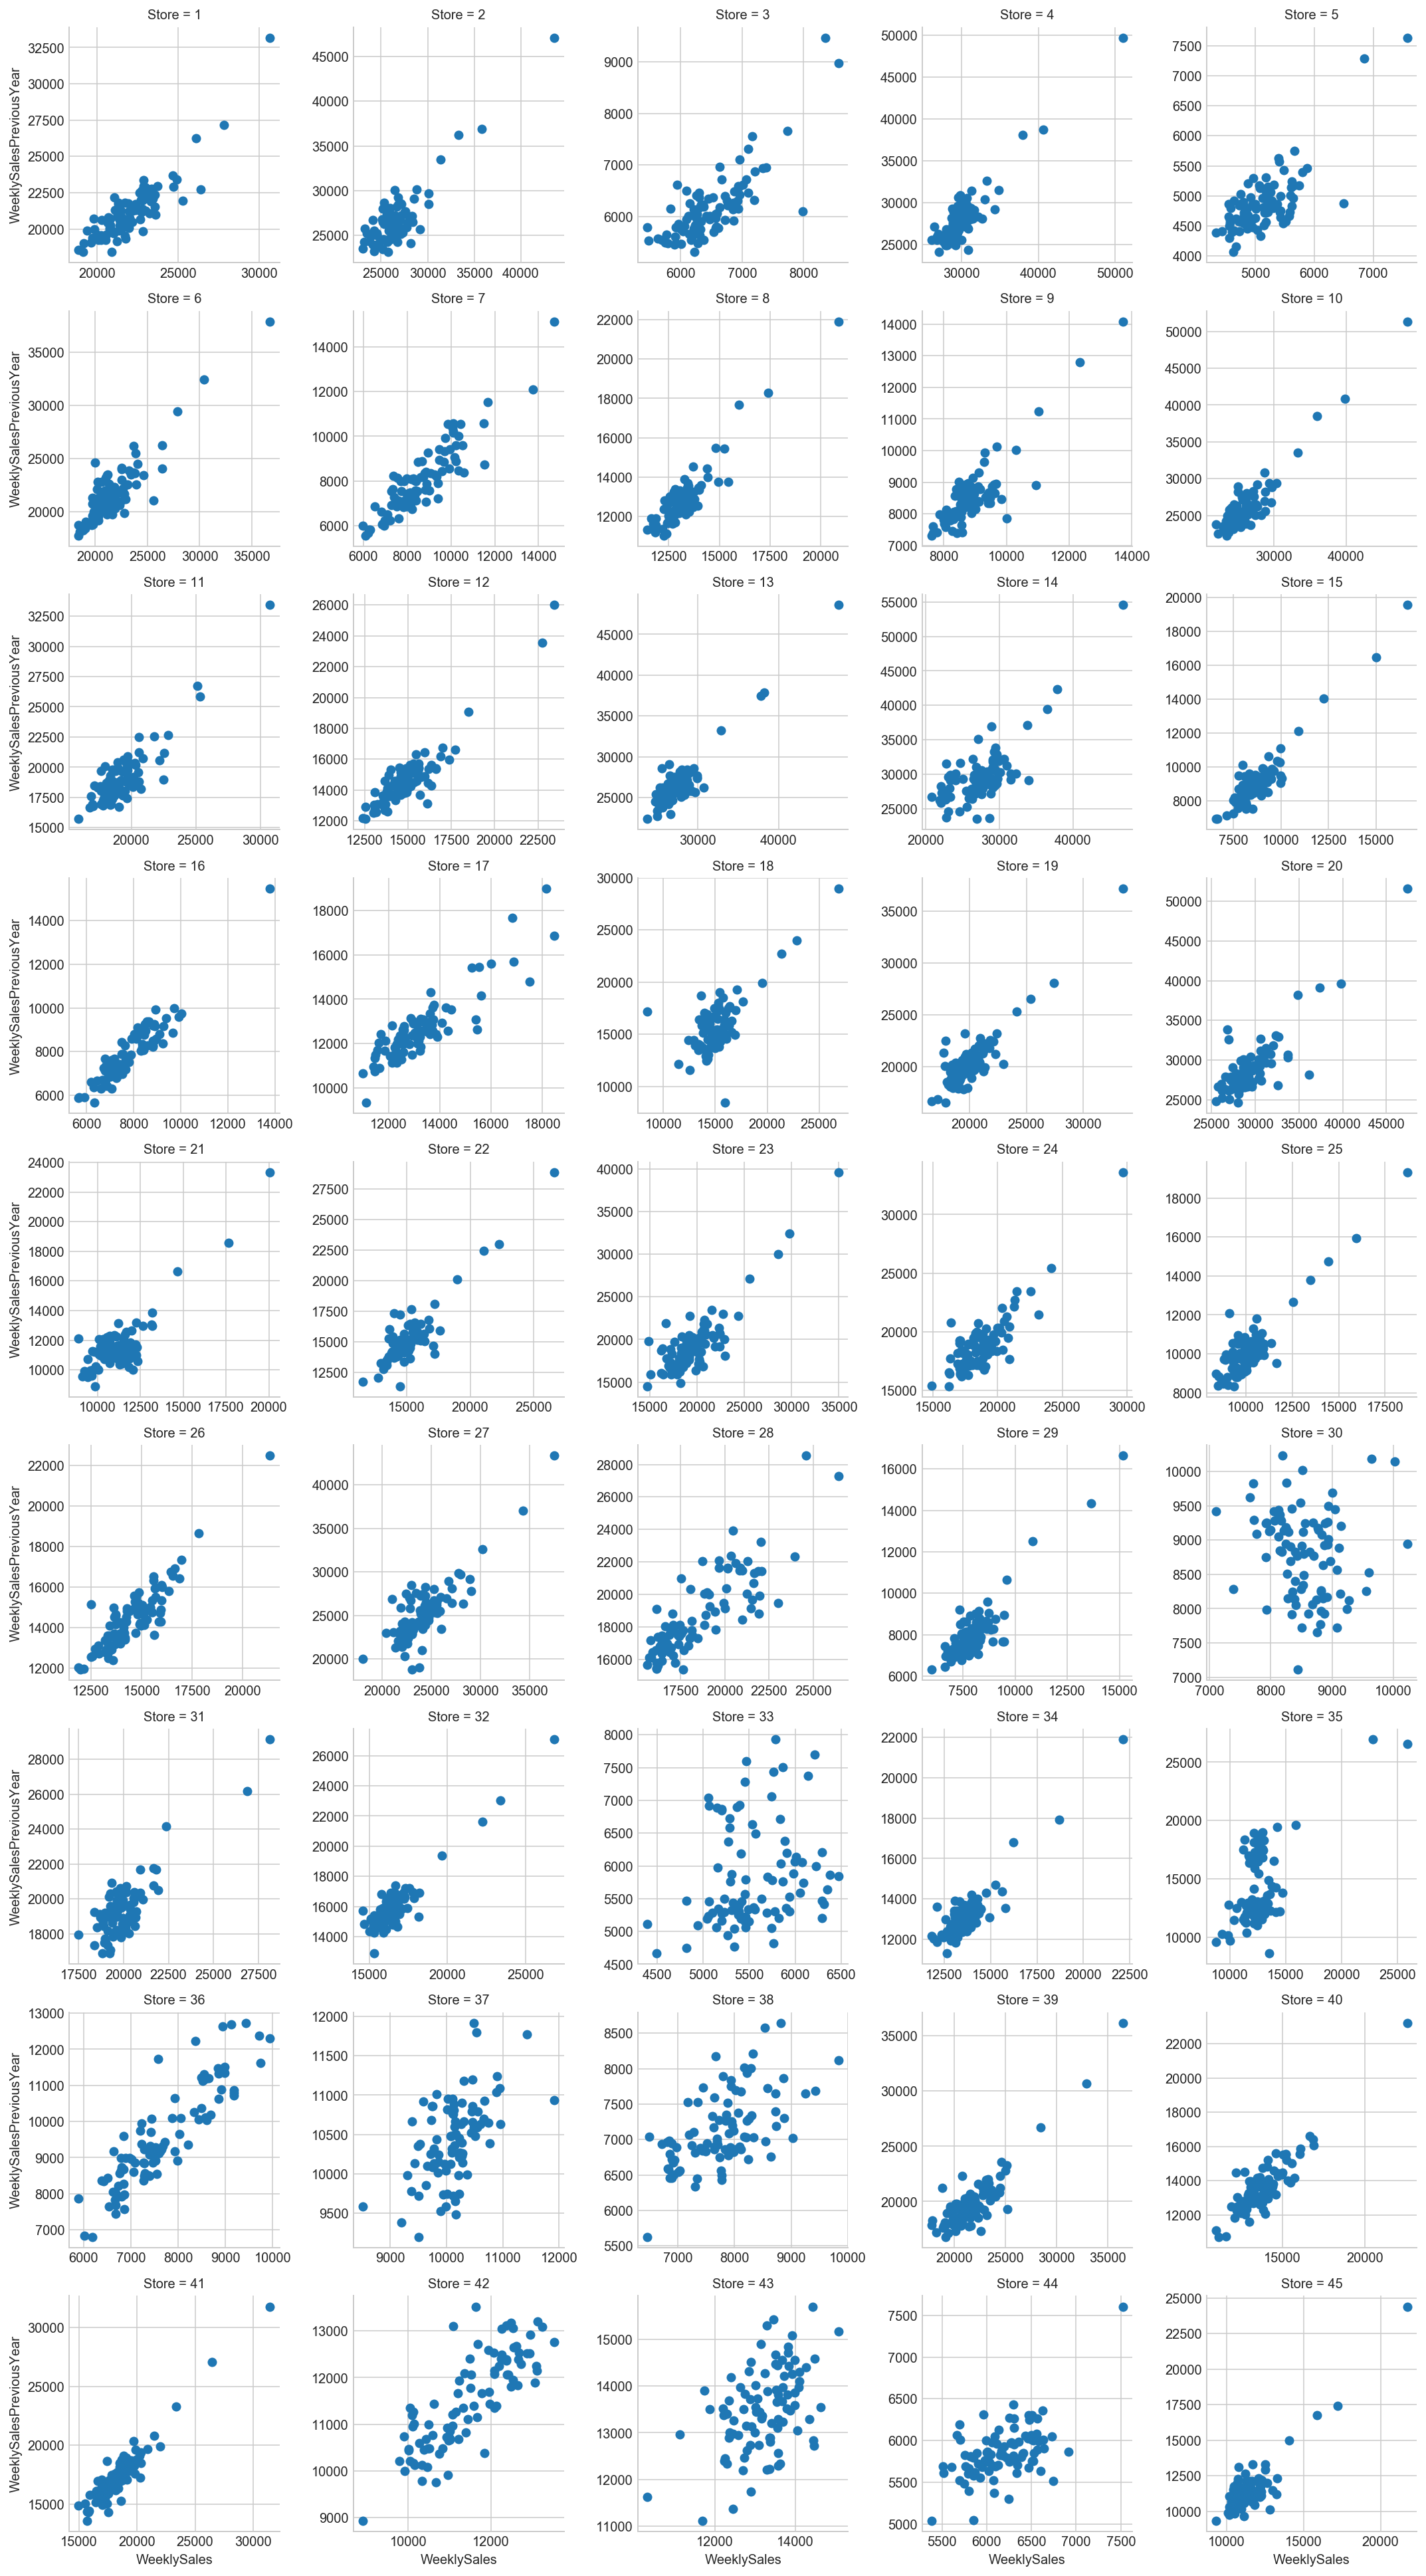

In [13]:
g = sns.FacetGrid(df.query('Train'), col="Store", col_wrap=5, sharex=False, sharey=False)
ax = g.map(plt.scatter, 'WeeklySales', 'WeeklySalesPreviousYear')

In [14]:
dfinc = df[['Store','WeeklySalesIncreaseRatio']].groupby('Store').mean().reset_index().sort_values('WeeklySalesIncreaseRatio')
dfinc

,Store,WeeklySalesIncreaseRatio
35,36,0.807662
34,35,0.904817
13,14,0.930908
14,15,0.964262
26,27,0.964744
32,33,0.965261
36,37,0.971917
17,18,0.972603
29,30,0.973861
20,21,0.976228


In [15]:
dfinc.WeeklySalesIncreaseRatio.mean()

1.008043679595424

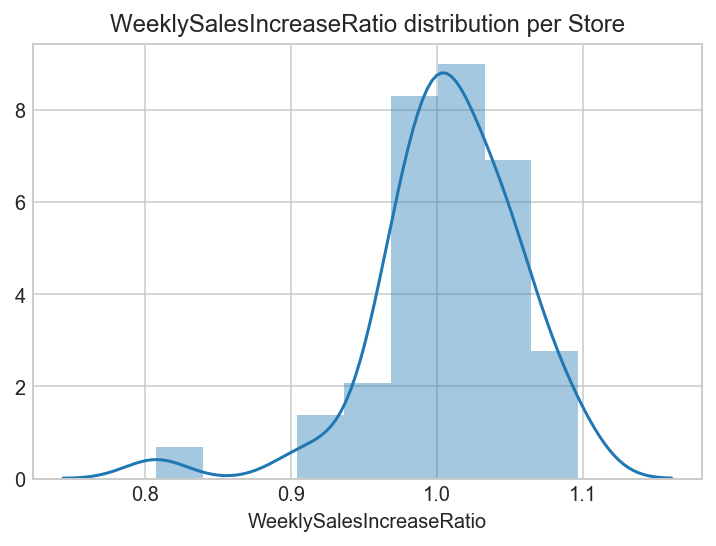

In [16]:
ax = sns.distplot(dfinc.WeeklySalesIncreaseRatio)
ax.set_title("WeeklySalesIncreaseRatio distribution per Store")
plt.show()

#### Is the timeseries stationary?

In [17]:
from statsmodels.tsa.stattools import adfuller
af = adfuller(df1_sales, autolag='AIC')
pd.DataFrame([list(af[0:4]) + list(af[4].values())], 
             columns=['Test Statistic','p-value','#Lags Used','Number of Observations Used'] + list(af[4].keys()))

,Test Statistic,p-value,#Lags Used,Number of Observations Used,1%,5%,10%
0,-5.110221,0.000013,4,138,-3.478648,-2.882722,-2.578065


* $H_0$: There's an unit root for the series
* $H_1$: There's no unit root for the series. The series is stationary   

We fail to reject $H_0$ as the p-value is smaller than the 1% critical value (in absolute terms). In other words, we fail to reject the hypothesis that the timeseries has an unit root, therefore we deem that the timeseries is not stationary within a 99% confidence level.

#### Do sales have monthly, quarterly and yearly seasonality patterns?

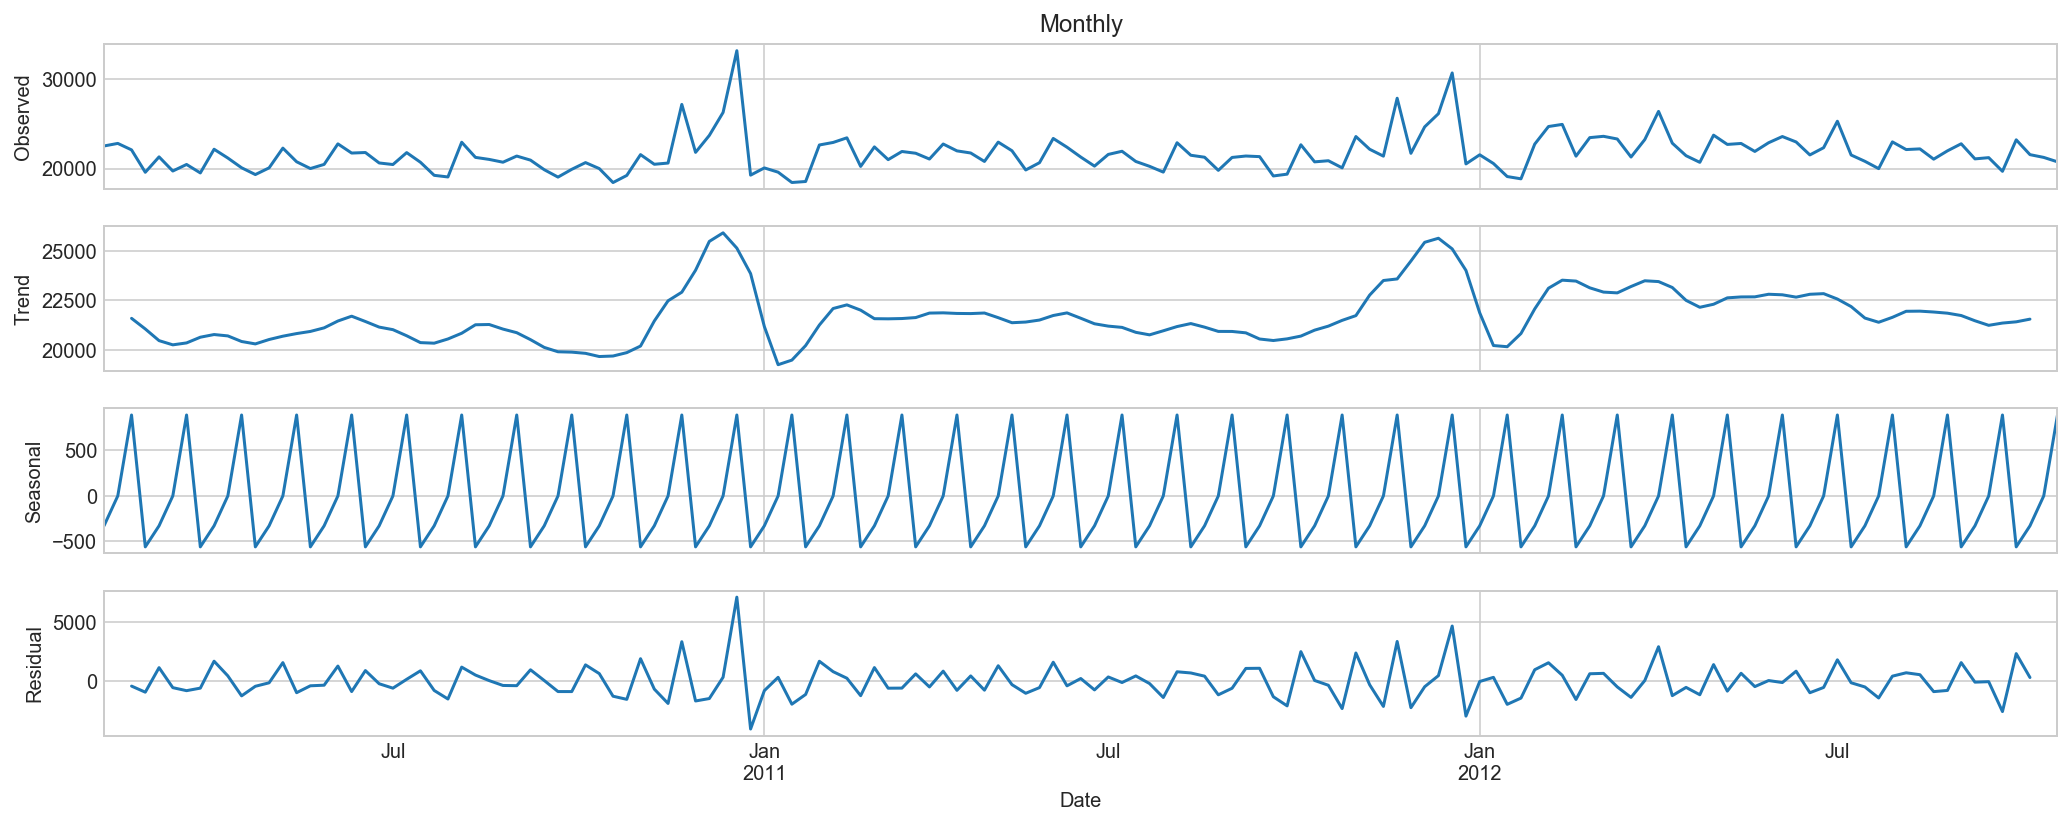

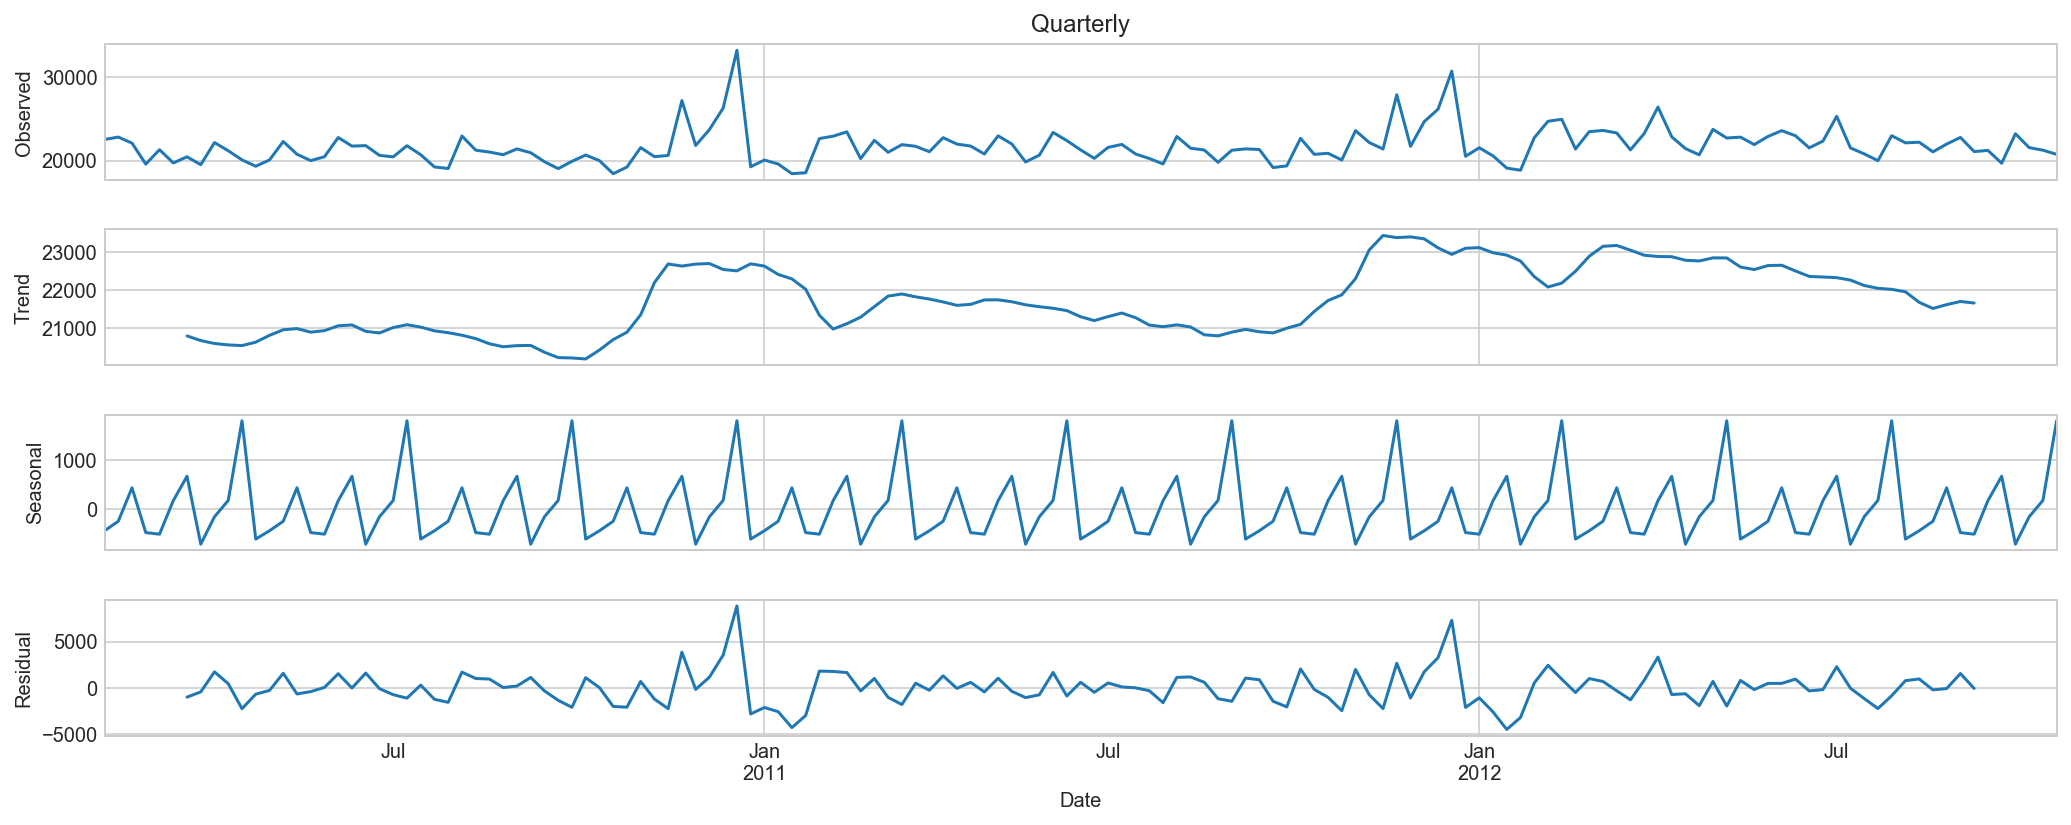

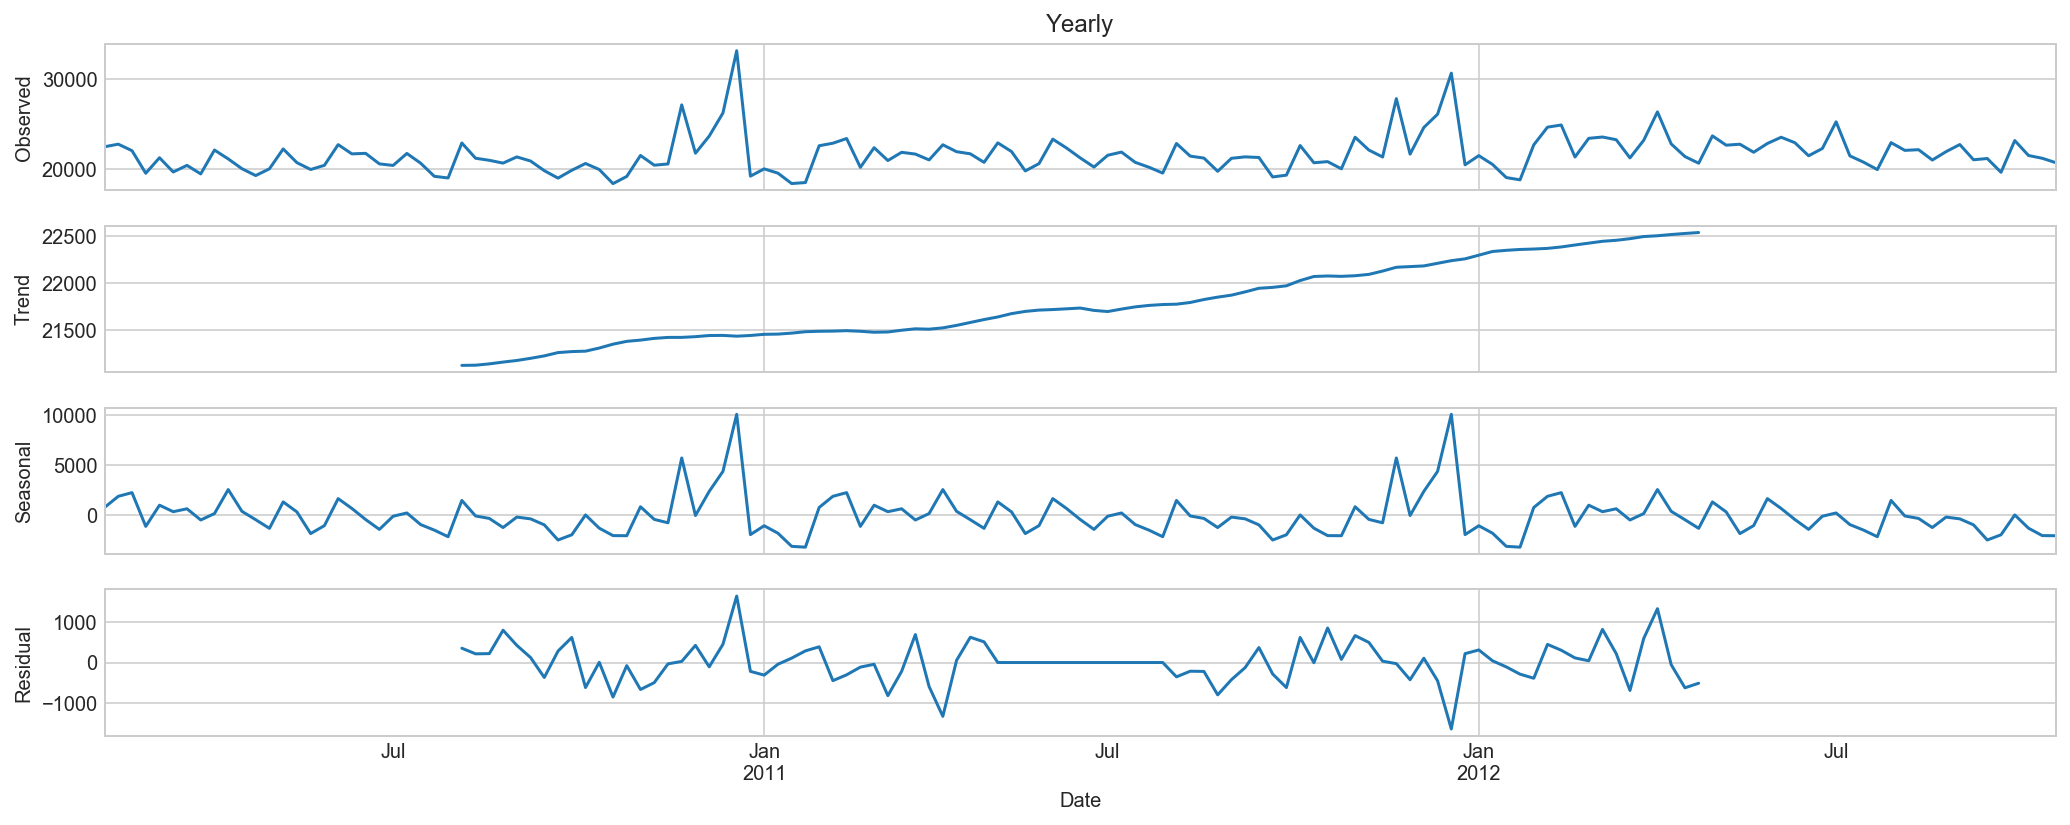

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df1_sales, freq=4)
fig = res.plot()
fig.set_size_inches(16,6)
fig.get_axes()[0].set_title('Monthly')
plt.show()

res = seasonal_decompose(df1_sales, freq=12)
fig = res.plot()
fig.set_size_inches(16,6)
fig.get_axes()[0].set_title('Quarterly')
plt.show()

res = seasonal_decompose(df1_sales, freq=52)
fig = res.plot()
fig.set_size_inches(16,6)
fig.get_axes()[0].set_title('Yearly')
plt.show()